In [69]:
# load the libraries
library(ggplot2)
library(dplyr)
library(data.table)
library(zoo)
library(reshape2)
library(magrittr)
# configure the display of large numbers
options(scipen=3)

In [70]:
# load the data on basic macro variables
dfData <- read.csv(file.path(getwd(), "data", "data_USA_China_comparison.csv"), na.strings = c(".."))
head(dfData)

Series.Name,Series.Code,Time,Time.Code,United.States..USA.,China..CHN.,Macao.SAR..China..MAC.,Hong.Kong.SAR..China..HKG.
GDP (current US$),NY.GDP.MKTP.CD,1960,YR1960,543300000000,59716467625,NA,1320796652
GDP (current US$),NY.GDP.MKTP.CD,1961,YR1961,563300000000,50056868958,NA,1383681651
GDP (current US$),NY.GDP.MKTP.CD,1962,YR1962,605100000000,47209359006,NA,1612346412
GDP (current US$),NY.GDP.MKTP.CD,1963,YR1963,638600000000,50706799903,NA,1935298266
GDP (current US$),NY.GDP.MKTP.CD,1964,YR1964,685800000000,59708343489,NA,2206466461
GDP (current US$),NY.GDP.MKTP.CD,1965,YR1965,743700000000,70436266147,NA,2435078534


In [65]:
tail(dfData)

,Series.Name,Series.Code,Time,Time.Code,United.States..USA.,China..CHN.,Macao.SAR..China..MAC.,Hong.Kong.SAR..China..HKG.
290,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,2013,YR2013,"96,61282",NA,NA,NA
291,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,2014,YR2014,"96,89284",NA,NA,NA
292,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,2015,YR2015,"97,37481",NA,NA,NA
293,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,2016,YR2016,"99,45686",NA,NA,NA
294,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,2017,YR2017,NA,NA,NA,NA
295,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,2018,YR2018,NA,NA,NA,NA


In [28]:
# rename the variables
dfData <- dfData %>% dplyr::rename(
    variable_name = Series.Name,
    Year = Time,
    USA = United.States..USA.,
    China = China..CHN.,
    MacaoChina = Macao.SAR..China..MAC.,
    HongKongChina = Hong.Kong.SAR..China..HKG.
) %>% dplyr::select(variable_name, Year, USA, China, MacaoChina, HongKongChina)

In [71]:
# view the renamed data
head(dfData)
tail(dfData)

Series.Name,Series.Code,Time,Time.Code,United.States..USA.,China..CHN.,Macao.SAR..China..MAC.,Hong.Kong.SAR..China..HKG.
GDP (current US$),NY.GDP.MKTP.CD,1960,YR1960,543300000000,59716467625,NA,1320796652
GDP (current US$),NY.GDP.MKTP.CD,1961,YR1961,563300000000,50056868958,NA,1383681651
GDP (current US$),NY.GDP.MKTP.CD,1962,YR1962,605100000000,47209359006,NA,1612346412
GDP (current US$),NY.GDP.MKTP.CD,1963,YR1963,638600000000,50706799903,NA,1935298266
GDP (current US$),NY.GDP.MKTP.CD,1964,YR1964,685800000000,59708343489,NA,2206466461
GDP (current US$),NY.GDP.MKTP.CD,1965,YR1965,743700000000,70436266147,NA,2435078534


,Series.Name,Series.Code,Time,Time.Code,United.States..USA.,China..CHN.,Macao.SAR..China..MAC.,Hong.Kong.SAR..China..HKG.
290,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,2013,YR2013,"96,61282",NA,NA,NA
291,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,2014,YR2014,"96,89284",NA,NA,NA
292,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,2015,YR2015,"97,37481",NA,NA,NA
293,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,2016,YR2016,"99,45686",NA,NA,NA
294,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,2017,YR2017,NA,NA,NA,NA
295,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,2018,YR2018,NA,NA,NA,NA


In [32]:
# split the data into per-variable data.tables
lDfData <- split(x = dfData, f = dfData[["variable_name"]])
lDtData <- lapply(X = lDfData, FUN = function(x) return(data.table::as.data.table(x)))
print(names(lDtData))

[1] "Central government debt, total (% of GDP)"
[2] "GDP (constant 2010 US$)"                  
[3] "GDP (current US$)"                        
[4] "GDP, PPP (constant 2011 international $)" 
[5] "Military expenditure (current USD)"       


In [109]:
# plotting the nominal GDP over time
dtDataNomGDP <- lDtData[[3]] %>% dplyr::select(Year, USA, China, MacaoChina, HongKongChina) %>% 
    rowwise() %>% dplyr::mutate(ChinaTotal = sum(China, MacaoChina, HongKongChina, na.rm = TRUE)) %>%
    dplyr::filter(Year != 2018) %>% dplyr::mutate(ratio_US_to_TotalChina = USA/ChinaTotal) %>% 
    data.table::as.data.table()
head(dtDataNomGDP)
tail(dtDataNomGDP)

Year,USA,China,MacaoChina,HongKongChina,ChinaTotal,ratio_US_to_TotalChina
1960,543300000000,59716467625,NA,1320796652,61037264277,"8,90112"
1961,563300000000,50056868958,NA,1383681651,51440550609,"10,95050"
1962,605100000000,47209359006,NA,1612346412,48821705418,"12,39408"
1963,638600000000,50706799903,NA,1935298266,52642098169,"12,13098"
1964,685800000000,59708343489,NA,2206466461,61914809950,"11,07651"
1965,743700000000,70436266147,NA,2435078534,72871344681,"10,20566"


Year,USA,China,MacaoChina,HongKongChina,ChinaTotal,ratio_US_to_TotalChina
2012,16155255000000,8560547314679,43031577366,262629441493,8866208333539,"1,822115"
2013,16691517000000,9607224481533,51552075902,275696879835,9934473437269,"1,680161"
2014,17427609000000,10482372109962,55347998648,291459356985,10829179465595,"1,609319"
2015,18120714000000,11064666282626,45361678147,309383627029,11419411587801,"1,586834"
2016,18624475000000,11190992550230,45310877913,320881182124,11557184610266,"1,611506"
2017,19390604000000,12237700479375,50361201096,341449340451,12629511020922,"1,535341"


In [54]:
lapply(dtDataNomGDP, typeof)

$Year
[1] "integer"

$USA
[1] "double"

$China
[1] "double"

$MacaoChina
[1] "double"

$HongKongChina
[1] "double"

$ChinaTotal
[1] "double"

$ratio_US_to_TotalChina
[1] "double"

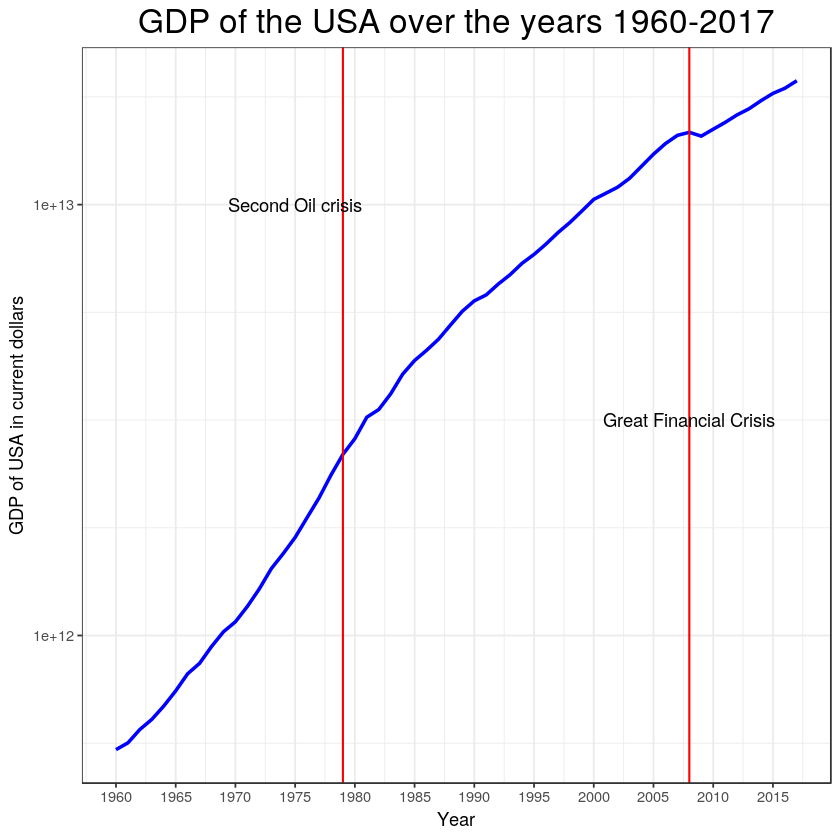

In [107]:
# plot of USA GDP on logarithmic scale
plot_USA_nominal_GDP <- ggplot2::ggplot(dtDataNomGDP) +
    ggplot2::aes(x = Year, y = USA) + ggplot2::theme_bw() +
    ggplot2::geom_line(color = "blue", size = 1) + 
    ggplot2::scale_y_log10(minor_breaks = 10^seq(11.5, 13.5, 0.25)) + 
    ggplot2::ylab("GDP of USA in current dollars") + ggplot2::ggtitle("GDP of the USA over the years 1960-2017") +
    ggplot2::scale_x_continuous(breaks = seq(1960, 2017, 5)) +    
    ggplot2::geom_vline(xintercept = 1979, size = 0.6, color = "red") +
    ggplot2::geom_vline(xintercept = 2008, size = 0.6, color = "red") +
    ggplot2::theme(plot.title = ggplot2::element_text(hjust = 0.5, size = 20)) +
    ggplot2::annotate("text", label = "Second Oil crisis", x = 1975, y = 1e+13) +
    ggplot2::annotate("text", label = "Great Financial Crisis", x=2008, y = 10^12.5)
plot_USA_nominal_GDP

In [101]:
### calculating average geomtric growth rates in various periods:
# 1) before 1979 oil shock
# 2) after 1979 oil shock until 2008-9 crisis
# 3) after the Great Financial Crisis

Year,country,value
1960,USA,"543,3"
1961,USA,"563,3"
1962,USA,"605,1"
1963,USA,"638,6"
1964,USA,"685,8"
1965,USA,"743,7"


,Year,country,value
111,2012,ChinaTotal,"8866,208"
112,2013,ChinaTotal,"9934,473"
113,2014,ChinaTotal,"10829,179"
114,2015,ChinaTotal,"11419,412"
115,2016,ChinaTotal,"11557,185"
116,2017,ChinaTotal,"12629,511"


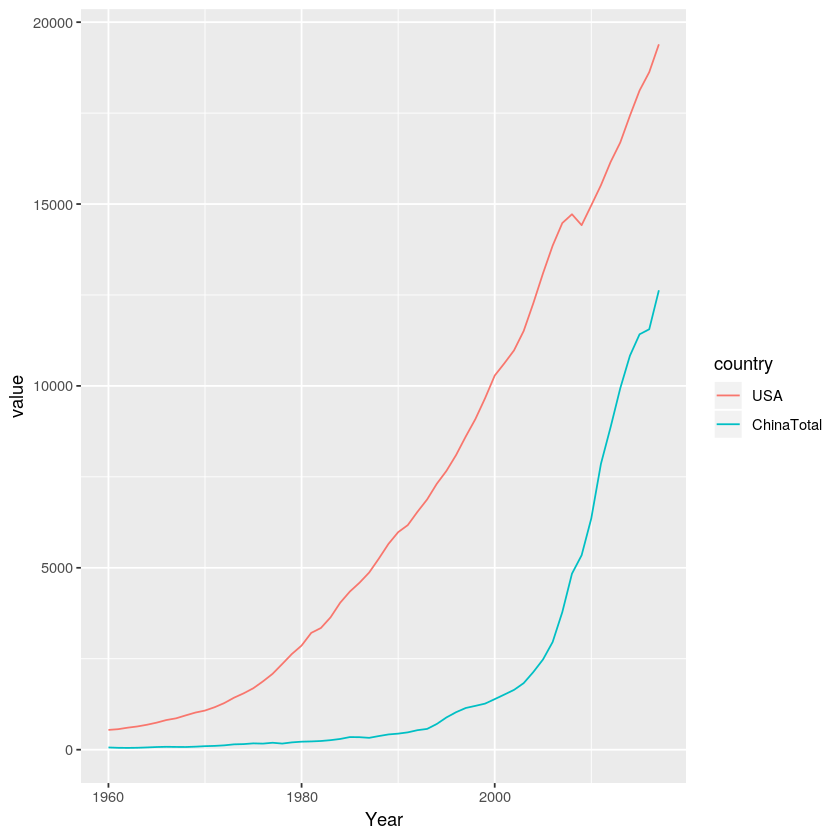

In [127]:
# plot USA and TotalChina Nominal GDPs - change unit to billions of USDs first
dtDataUsaChina <- dtDataNomGDP[, list(Year, USA, ChinaTotal), ] %>% 
    melt(id.vars = "Year", variable.name = "country", measure.vars = c("USA", "ChinaTotal")) %>%
    dplyr::mutate(value = value/1e+9)
head(dtDataUsaChina)
tail(dtDataUsaChina)
plot_USA_vs_China <- ggplot2::ggplot(dtDataUsaChina) +
    ggplot2::geom_line(ggplot2::aes(x = Year, y = value, color = country))
plot_USA_vs_China